# Lab3 : K-means (unsupervised Learning)

## Implementation :

In [196]:
# library :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [255]:
# Read the data and create DataFrame :
df = pd.read_csv("data_kmeans.txt", header=None, sep=' ', names=['X1', 'X2'])

# print the DataFrame & columns :
# print(df)
# print(df.columns.values)

# The matrix X
X = np.array(df)

### Plot the data :

<AxesSubplot:xlabel='X1', ylabel='X2'>

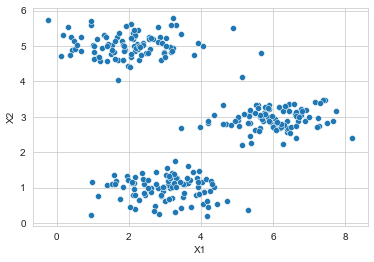

In [256]:
sns.scatterplot(data=df, x="X1", y="X2")

### Indicatrice function and initialisation of $\mu$ :

- Indicatrice function :
$$ \mathbb{1} \left\{ \hat{y}^{(i)} = k \right\} $$

- if $\hat{y}^{(i)} = k$ the indicatrice function returns 1
- else it returns 0

In [257]:
# Init the m matrix
def Init_mu(a,b):
    m = np.random.uniform(low=a, high=b, size=(K,N))
    return m

# Indicatrice functions :
def Indicatrice(y, k):
    if (y == k):
        return 1.0
    else:
        return 0.0

### Initialisation of matrix D and y :

In [258]:
# Enter the number of Clusters :
K = 3
N = X.shape[1]
I = X.shape[0]

In [259]:
# Init the D matrix
D = np.zeros((I,K), dtype=float)
# print(D)

# Init the Y matrix
y = np.ones((I,1))
# y.shape

### K-means algorithm :

- calculate $d_k^i$ :

$$ d_k^{(i)} = \left\Vert X^{(i)} - \mu_k \right\Vert_2$$


- get the output $\hat{y}^{(i)}$ :

$$ \hat{y}^{(i)} = argmin_k (d_k^{(i)})^2 $$


- update $\mu_k$ with the indicatrice function :
$$ \mu_k = \frac{\sum_{i=1}^I \mathbb{1} \left\{ \hat{y}^{(i)} = k \right\} X^{(i)}}{\sum_{i=1}^I \mathbb{1} \left\{ \hat{y}^{(i)} = k \right\}} $$

In [260]:
# algorithm :
m = Init_mu(0,9)
j = 0
iterations = 10

while j < iterations:
    for i in range(I):
        for k in range(K):
            D[i,k] = np.linalg.norm(X[i,:] - m[k,:])
        
    for i in range(I):
        y[i] = np.argmin( np.power(D[i,:],2) )
    
    for k in range(K):
        s1 = 0
        s2 = 0
        for i in range(I):
            s1 += (Indicatrice(y[i],k) * X[i,:])
            s2 += Indicatrice(y[i],k)
        if (s2 == 0):
            break
        else:
            m[k,:] = s1 / s2
    if (s2 == 0):
        j = 0
        Init_mu(0,8)
        

    
    j = j + 1

## Interpretation :

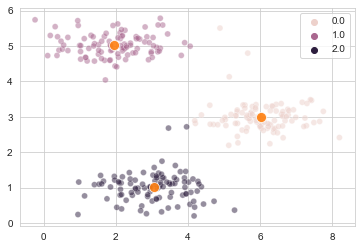

In [261]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y[:,0], alpha=0.5)
sns.scatterplot(x=m[:,0], y=m[:,1], alpha=0.9, s=100)
plt.show()

### Testing the model with some new data :

In [262]:
# init data test
data_test = np.random.rand(300,2)
data_test = data_test * 8

y_2 = np.zeros((300,1))

In [263]:
for i in range(I):
    for k in range(K):
        D[i,k] = np.linalg.norm(data_test[i,:] - m[k,:])
        
for i in range(I):
        y_2[i] = np.argmin( np.power(D[i,:],2) )

### Result

<AxesSubplot:>

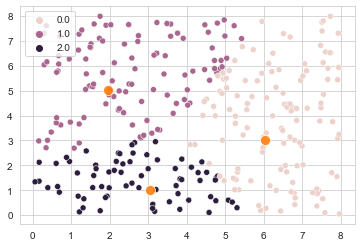

In [264]:
sns.scatterplot(x=data_test[:,0], y=data_test[:,1], hue=y_2[:,0])
sns.scatterplot(x=m[:,0], y=m[:,1], alpha=0.9, s=100)